In [20]:
import numpy as np
import pgan
import pickle
import matplotlib.pyplot as plt

In [8]:
def unpuckle(file):
    with open(file, 'rb') as f:
        images = pickle.load(f, encoding='bytes')
    return images

In [13]:
path = '../../Datasets/cifar-10-python/cifar-10-batches-py/data_batch_1'
batch_1 = unpuckle(path)
print(batch_1.keys())

dict_keys([b'labels', b'batch_label', b'data', b'filenames'])


In [19]:
images = batch_1[b'data']
for k, v in batch_1.items():
    print(k, np.array(v).shape)

b'labels' (10000,)
b'batch_label' ()
b'data' (10000, 3072)
b'filenames' (10000,)


255 0 <class 'numpy.ndarray'>


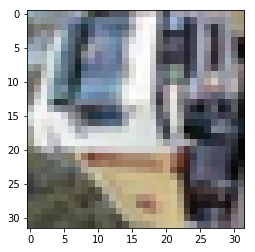

In [38]:
plt.imshow(images[1, :].reshape((32, 32, -1), order='F'))
print(np.max(images), np.min(images), type(images))